In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# method to get the categorical data and it statiscal features.
data.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


In [6]:
# method to view all the numerical data and staticstical features.
data.describe(include=['int64'])

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Declear the dependent/prediction variable
target = data['price']
target.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [8]:
data1 = data.drop(['price'],axis=1)
data1.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


C:\Users\pc\AppData\Local\Temp\ipykernel_1544\2521338091.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, hist=True)


<Axes: xlabel='price', ylabel='Density'>

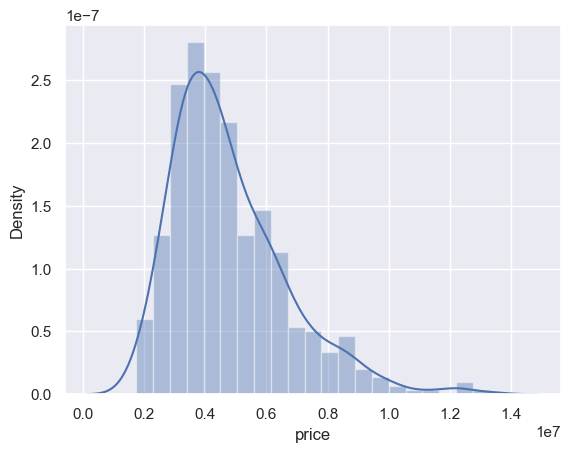

In [9]:
sns.distplot(target, hist=True)

### Transform the data from a left skew to a normally distributed form which is ideal for our model

C:\Users\pc\AppData\Local\Temp\ipykernel_1544\1280632414.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target_log, hist=True)


<Axes: xlabel='price', ylabel='Density'>

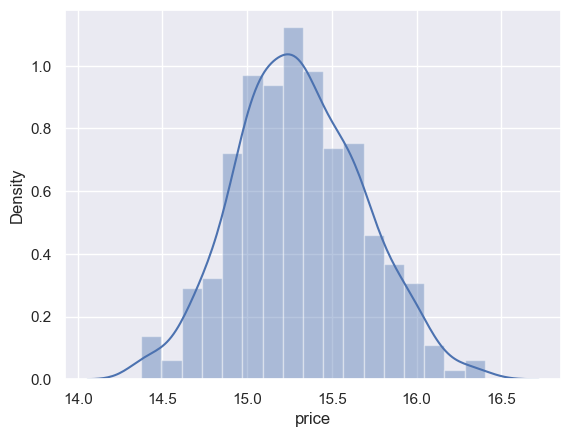

In [10]:
target_log = np.log(target)
sns.distplot(target_log, hist=True)

### seperate the categorical data and numerical data into seperate dataframes

In [11]:
data1['parking'] = data1['parking'].astype(str)

In [12]:
cat_col = [col for col in data1.columns.values if data1[col].dtype == 'object']

cat_df = data1[cat_col]
num_df = data1.drop(cat_col,axis=1)

In [13]:
# Dataframe for the numerical features/weights
num_df.describe()

,area,bedrooms,bathrooms,stories
count,545.000000,545.000000,545.000000,545.000000
mean,5150.541284,2.965138,1.286239,1.805505
std,2170.141023,0.738064,0.502470,0.867492
min,1650.000000,1.000000,1.000000,1.000000
25%,3600.000000,2.000000,1.000000,1.000000
50%,4600.000000,3.000000,1.000000,2.000000
75%,6360.000000,3.000000,2.000000,2.000000
max,16200.000000,6.000000,4.000000,4.000000


In [14]:
# Dataframe for the categorical features/weights
cat_df.describe()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,545,545,545,545,545,545,545,545
unique,2,2,2,2,2,4,2,3
top,yes,no,no,no,no,0,no,semi-furnished
freq,468,448,354,520,373,299,417,227


### Visualise the numerical features histogram to check for skewness

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>]], dtype=object)

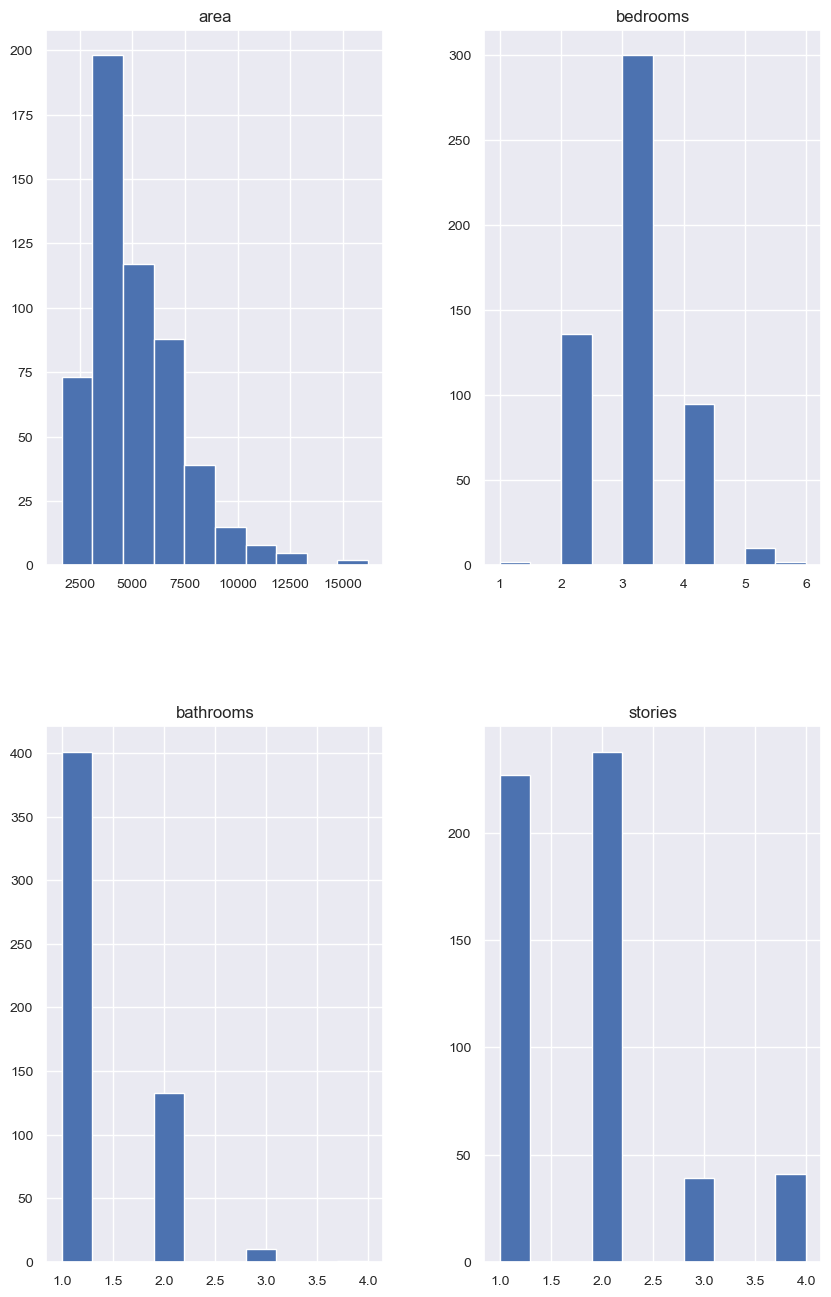

In [15]:
num_df.hist(figsize=(10,16),xlabelsize=10,ylabelsize=10)

In [16]:
# we want to determine the colum which is skewed and perform a log transform to convert to normally distributed
from scipy.stats import skew
num_skew = num_df.apply(lambda x: skew(x.dropna()))
num_skew = num_skew[num_skew > .75]

num_df[num_skew.index] = np.log(num_df[num_skew.index])

In [17]:
# number of columns that are skewed and have been transformed.
num_skew.head()

area         1.317549
bathrooms    1.584886
stories      1.079108
dtype: float64

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>]], dtype=object)

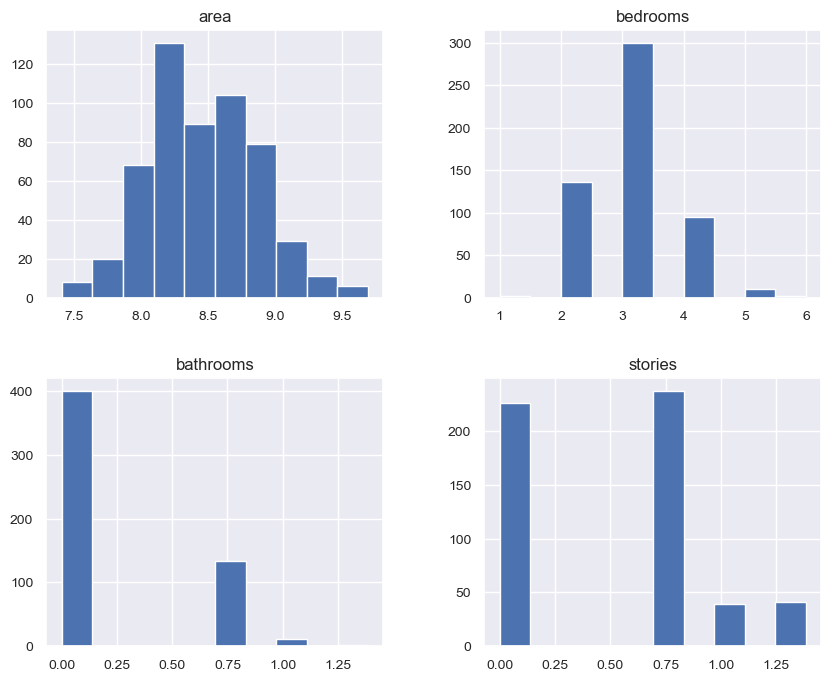

In [18]:
num_df.hist(figsize=(10,8),xlabelsize=10,ylabelsize=10)

### we have normalize our numeric column ie scaling a variable to have value between 0 and 1

In [19]:
num_df_nor = ((num_df - num_df.mean()/num_df.max() - num_df.min()))
num_df_nor.describe()


,area,bedrooms,bathrooms,stories
count,545.000000,545.000000,545.000000,545.000000
mean,0.184517,1.470948,0.053461,0.135314
std,0.398283,0.738064,0.326048,0.453129
min,-0.873490,-0.494190,-0.138394,-0.350288
25%,-0.093332,0.505810,-0.138394,-0.350288
50%,0.151791,1.505810,-0.138394,0.342860
75%,0.475763,1.505810,0.554753,0.342860
max,1.410746,4.505810,1.247900,1.036007


array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'stories'}>]], dtype=object)

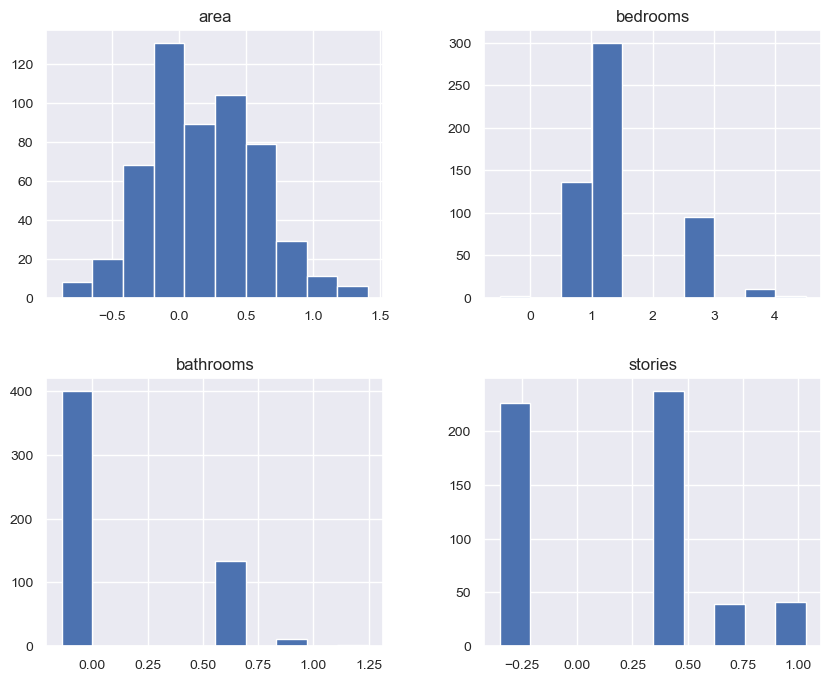

In [20]:
num_df_nor.hist(figsize=(10,8),xlabelsize=10,ylabelsize=10)

### If columns contain more missing values than actual value it is better to drop such a column otherwise we perform inputation technique which involves replacing null values with mean, median or mode depending on the context of the data

In [21]:
# To check for missing value which is zero
data1.isnull().sum()

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [22]:
cat_df.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
cat_df_dummies = pd.get_dummies(cat_df,drop_first=True)
cat_df_dummies = cat_df_dummies.astype(int)

In [24]:
cat_df_dummies.head()

,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,parking_1,parking_2,parking_3,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1,0,0,0,1,0,1,0,1,0,0
1,1,0,0,0,1,0,0,1,0,0,0
2,1,0,1,0,0,0,1,0,1,1,0
3,1,0,1,0,1,0,0,1,1,0,0
4,1,1,1,0,1,0,1,0,0,0,0


In [25]:
df = pd.concat([num_df_nor,cat_df_dummies], axis=1)

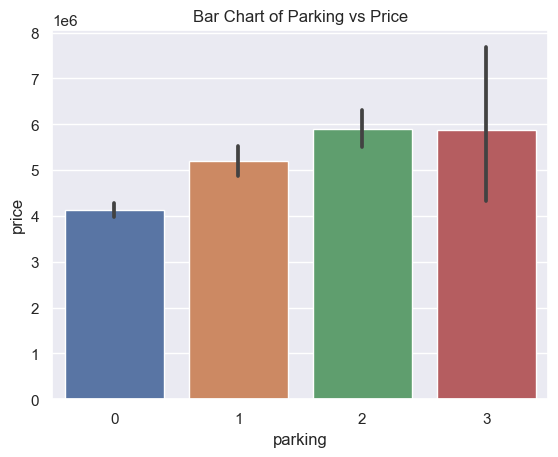

In [26]:
sns.barplot(data=data,x='parking',y='price')
plt.title('Bar Chart of Parking vs Price')
plt.show()

### Inference
The higher the paking option the higher the price

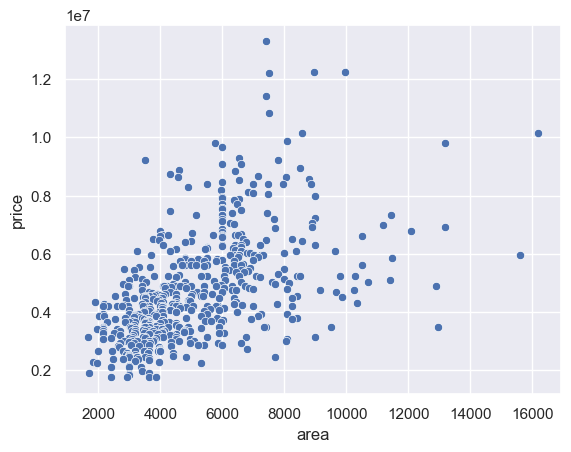

In [27]:
sns.scatterplot(data=data,x='area',y='price')
plt.show()

<Axes: xlabel='furnishingstatus', ylabel='price'>

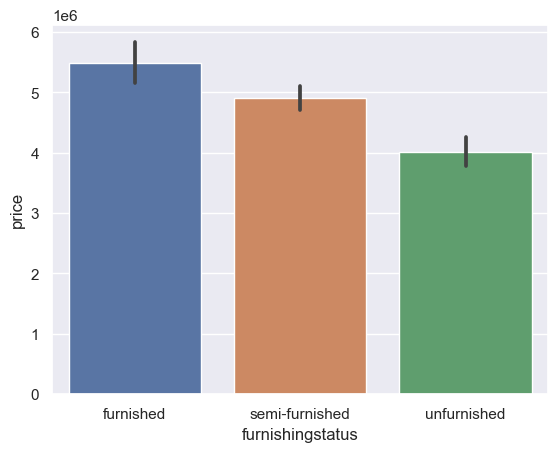

In [28]:
sns.barplot(data=data,x='furnishingstatus',y='price')

<function matplotlib.pyplot.show(close=None, block=None)>

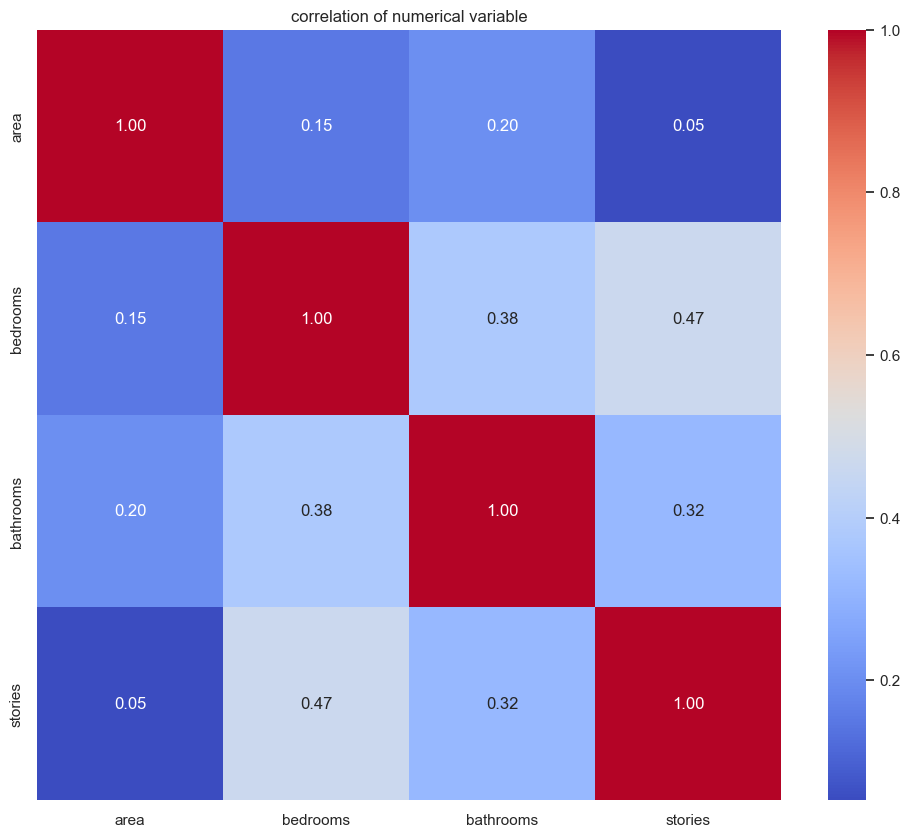

In [29]:
corr = num_df.corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation of numerical variable')
plt.show

### Infrence
This plot shows correlation between all numerical variable

<function matplotlib.pyplot.show(close=None, block=None)>

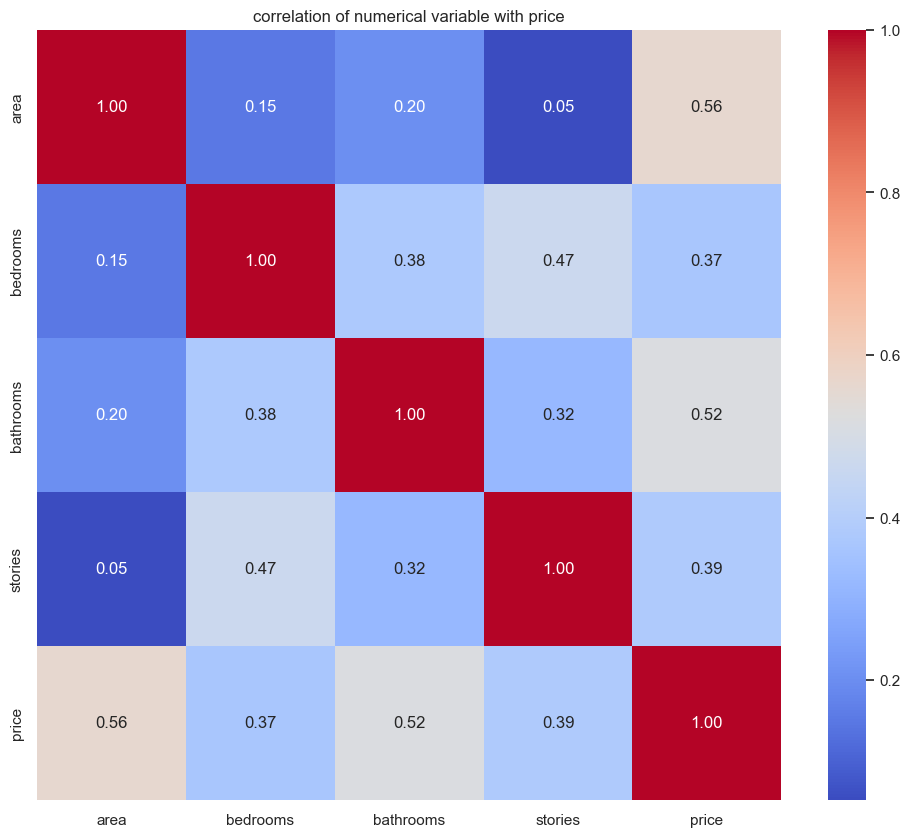

In [30]:
new_num = num_df
new_num['price'] = data['price']


corr2 = new_num.corr()
plt.figure(figsize=(12,10))

sns.heatmap(corr2, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('correlation of numerical variable with price')
plt.show

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target_log,test_size=0.20,random_state=0)

In [32]:
import statsmodels.api as sm

In [33]:
#build linear regression model using OLS
model = sm.OLS(y_train, x_train).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              548.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):                   3.14e-265
Time:                        14:27:09   Log-Likelihood:                         -1149.6
No. Observations:                 436   AIC:                                      2329.
Df Residuals:                     421   BIC:                                      2390.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
area                               -1.5091      0.499     -3.022      0.003      -2.491      -0.527
bedrooms                            2.9740      0.229     12.999      0.000       2.524       3.424
bathrooms                          -1.0520      0.573     -1.835      0.067      -2.179       0.075
stories                            -1.8354      0.436     -4.214      0.000      -2.691      -0.979
mainroad_yes                        7.0226      0.402     17.452      0.000       6.232       7.814
guestroom_yes                       0.7891      0.480      1.644      0.101      -0.154       1.732
basement_yes                        0.3488      0.404      0.864      0.388      -0.445       1.142
hotwaterheating_yes                 1.1256      0.885      1.272      0.204      -0.614       2.866
airconditioning_yes                 1.5532      0.384      4.046      0.000       0.799       2.308
parking_1                           1.6245      0.428      3.792      0.000       0.782       2.467
parking_2                           0.4209      0.463      0.909      0.364      -0.490       1.331
parking_3                           0.7661      1.142      0.671      0.503      -1.479       3.011
prefarea_yes                        0.3506      0.415      0.846      0.398      -0.464       1.165
furnishingstatus_semi-furnished     4.1315      0.381     10.840      0.000       3.382       4.881
furnishingstatus_unfurnished        4.7716      0.394     12.125      0.000       3.998       5.545
==============================================================================
Omnibus:                       24.985   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.255
Skew:                           0.533   Prob(JB):                     4.44e-07
Kurtosis:                       3.688   Cond. No.                         14.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
def rms(predictions, targets):
    
    diffrence = predictions - targets
    squ_diffrence = diffrence **2
    mean = squ_diffrence.mean()
    rms = np.sqrt(mean)
    
    return rms

In [52]:
data_list =[]
col = ['Model','R-squared value','Adj.R-squared value','RMS Value']

model_report1 = pd.DataFrame(columns = col)

prediction1 = model.predict(x_test)

In [53]:
tmp1 = pd.Series({'Model':'Base Linear Regression Model',
                 'R-squared value':model.rsquared,
                 'Adj. R-squared value':model.rsquared_adj,
                 'RMS Value':rms(prediction1,y_test)})
data_list.append(tmp1)

In [55]:
model_report = pd.DataFrame(data_list, columns=col)
model_report

,Model,R-squared value,Adj.R-squared value,RMS Value
0,Base Linear Regression Model,0.951282,NaN,3.577362


### Building our model with constant

In [56]:
df_constant = sm.add_constant(df)

from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(df_constant,target_log,test_size=0.20,random_state=0)

In [57]:
#build linear regression model using OLS with added constant
model2 = sm.OLS(y_train1, x_train1).fit()

In [58]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     69.46
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.47e-103
Time:                        15:30:01   Log-Likelihood:                 75.424
No. Observations:                 436   AIC:                            -118.8
Df Residuals:                     420   BIC:                            -53.61
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              14.9634      0.044    339.664      0.000      14.877      15.050
area                                0.3122      0.031     10.206      0.000       0.252       0.372
bedrooms                            0.0331      0.016      2.030      0.043       0.001       0.065
bathrooms                           0.2486      0.035      7.146      0.000       0.180       0.317
stories                             0.1567      0.027      5.824      0.000       0.104       0.210
mainroad_yes                        0.0992      0.032      3.129      0.002       0.037       0.161
guestroom_yes                       0.0681      0.029      2.347      0.019       0.011       0.125
basement_yes                        0.0756      0.024      3.105      0.002       0.028       0.123
hotwaterheating_yes                 0.2010      0.053      3.761      0.000       0.096       0.306
airconditioning_yes                 0.1627      0.024      6.920      0.000       0.116       0.209
parking_1                           0.0536      0.026      2.043      0.042       0.002       0.105
parking_2                           0.0879      0.028      3.147      0.002       0.033       0.143
parking_3                          -0.0330      0.069     -0.479      0.632      -0.168       0.102
prefarea_yes                        0.1367      0.025      5.468      0.000       0.088       0.186
furnishingstatus_semi-furnished     0.0006      0.026      0.025      0.980      -0.050       0.052
furnishingstatus_unfurnished       -0.1323      0.028     -4.764      0.000      -0.187      -0.078
==============================================================================
Omnibus:                        1.168   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.558   Jarque-Bera (JB):                0.949
Skew:                          -0.077   Prob(JB):                        0.622
Kurtosis:                       3.170   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""